In [15]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [16]:
# define state 
class BMIState(TypedDict):
    height_cm: float
    weight_kg: float
    bmi: float
    category: str

In [17]:
# make a node calculate bmi 
def calculate_bmi(state: BMIState) -> BMIState:
    height_m = state["height_cm"] / 100
    weight_kg = state["weight_kg"]
    bmi = weight_kg / (height_m ** 2)
    state["bmi"] = round(bmi, 2) 
    return state  

# add onother node(function) 
def display_category(state:BMIState) -> BMIState:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state["category"] = category
    return state

In [18]:
# create state graph
bmi_graph = StateGraph(BMIState)

# add nodes
bmi_graph.add_node("calculate_bmi", calculate_bmi)
bmi_graph.add_node("display_category", display_category)

# add edges 
bmi_graph.add_edge(START, "calculate_bmi")
bmi_graph.add_edge("calculate_bmi", "display_category")
bmi_graph.add_edge("display_category", END)


# compile graph 
workflow = bmi_graph.compile()

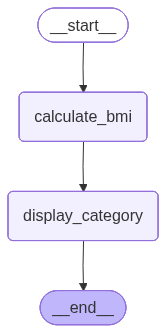

In [19]:
workflow

In [20]:
initial_state = {
    "height_cm": 170,
    "weight_kg": 65
}
result_state = workflow.invoke(initial_state)
result_state

{'height_cm': 170, 'weight_kg': 65, 'bmi': 22.49, 'category': 'Normal weight'}